In [39]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows',100)

df=pd.read_csv('..\Data\cleaned_googleplaystore.csv')
# df=pd.read_csv('/content/drive/MyDrive/Develhope/Develhope_stage2/data-5---team-4/Stage_2/Data/cleaned_googleplaystore.csv')

## Task_1 - print(table) the unique names of all categories

In [40]:
pd.DataFrame(df['Category'].unique(), columns=['Category'])

,Category
0,ART_AND_DESIGN
1,AUTO_AND_VEHICLES
2,BEAUTY
3,BOOKS_AND_REFERENCE
4,BUSINESS
5,COMICS
6,COMMUNICATION
7,DATING
8,EDUCATION
9,ENTERTAINMENT


## Task_2 - plot a bar chart for categories with the total number of installing numbers in each category 

In [41]:
df_number_of_installs=(df.groupby(["Category"])["Installs"].sum()/1_000_000).sort_values(ascending=False)

In [42]:
df_number_of_installs

Category
GAME                   13377.762717
COMMUNICATION          11038.241530
TOOLS                   8000.725500
FAMILY                  6242.080590
PRODUCTIVITY            5793.070180
SOCIAL                  5487.841475
PHOTOGRAPHY             4649.143130
VIDEO_PLAYERS           3931.797200
TRAVEL_AND_LOCAL        2894.859300
NEWS_AND_MAGAZINES      2369.110650
BOOKS_AND_REFERENCE     1665.791655
PERSONALIZATION         1532.352930
SHOPPING                1400.331540
HEALTH_AND_FITNESS      1144.006220
SPORTS                  1096.431465
ENTERTAINMENT            984.660000
BUSINESS                 697.018120
LIFESTYLE                503.741120
MAPS_AND_NAVIGATION      503.267560
FINANCE                  455.312400
WEATHER                  361.096500
FOOD_AND_DRINK           211.677750
EDUCATION                189.351000
DATING                   140.912410
ART_AND_DESIGN           113.233100
HOUSE_AND_HOME            97.072000
AUTO_AND_VEHICLES         53.129800
LIBRARIES_AND_DEMO 

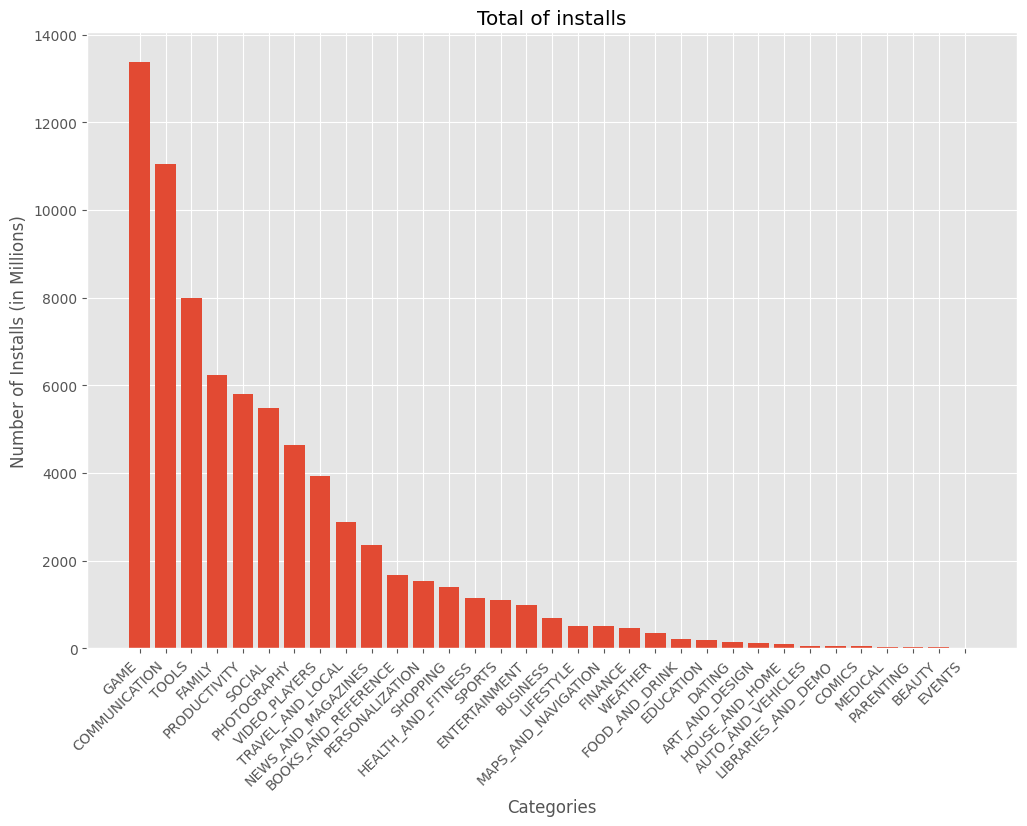

In [43]:
# create a bar chart to visualize the data
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(df_number_of_installs.index, df_number_of_installs.values)
# to make the chart horizontal, use ax.barh instead of ax.bar above
ax.set_xlabel('Categories')
ax.set_title('Total of installs')
ax.set_ylabel('Number of Installs (in Millions)')
plt.xticks(rotation=45, ha='right')
plt.show()

## Task_3 - plot a bar chart for the total prices of each paid app in each category (the summation of all prices in the same category)

In [44]:
# Checking the App Prices
df[['Category','App','Type','Price']].query('Type=="Paid"').sort_values('Category')

,Category,App,Type,Price
3473,ART_AND_DESIGN,"X Launcher Pro: PhoneX Theme, OS11 Control Center",Paid,1.99
3477,ART_AND_DESIGN,X Launcher Pro - IOS Style Theme & Control Center,Paid,1.99
3482,ART_AND_DESIGN,X Launcher Prime: With OS Style Theme & No Ads,Paid,1.99
3013,AUTO_AND_VEHICLES,Ulysse Speedometer Pro,Paid,1.99
5044,BOOKS_AND_REFERENCE,17th Edition Cable Sizer,Paid,3.08
...,...,...,...,...
3658,WEATHER,MyRadar NOAA Weather Radar Ad Free,Paid,2.99
6713,WEATHER,Weather Forecast Pro,Paid,3.99
3441,WEATHER,W Pro - Weather Forecast & Animated Weather Maps,Paid,1.99
8015,WEATHER,Florida Tides & Weather,Paid,6.99


In [45]:
df_catergory_prices=df[['App','Category','Type','Price']].query('Type=="Paid"') \
    .groupby(['Category'], sort=True)['Price'] \
    .agg('sum').sort_values(ascending=False)

In [46]:
df_catergory_prices

Category
FINANCE                2439.87
FAMILY                 2271.80
LIFESTYLE              1960.88
MEDICAL                 623.87
GAME                    277.37
TOOLS                   207.90
PERSONALIZATION         124.28
SPORTS                   93.21
PHOTOGRAPHY              72.31
PRODUCTIVITY             70.92
BUSINESS                 64.41
COMMUNICATION            56.69
HEALTH_AND_FITNESS       42.39
TRAVEL_AND_LOCAL         37.49
WEATHER                  29.43
MAPS_AND_NAVIGATION      26.95
BOOKS_AND_REFERENCE      23.88
DATING                   18.97
VIDEO_PLAYERS            10.46
PARENTING                 9.58
FOOD_AND_DRINK            8.48
ENTERTAINMENT             7.98
EDUCATION                 7.98
ART_AND_DESIGN            5.97
SHOPPING                  5.48
NEWS_AND_MAGAZINES        3.98
AUTO_AND_VEHICLES         1.99
SOCIAL                    1.98
Name: Price, dtype: float64

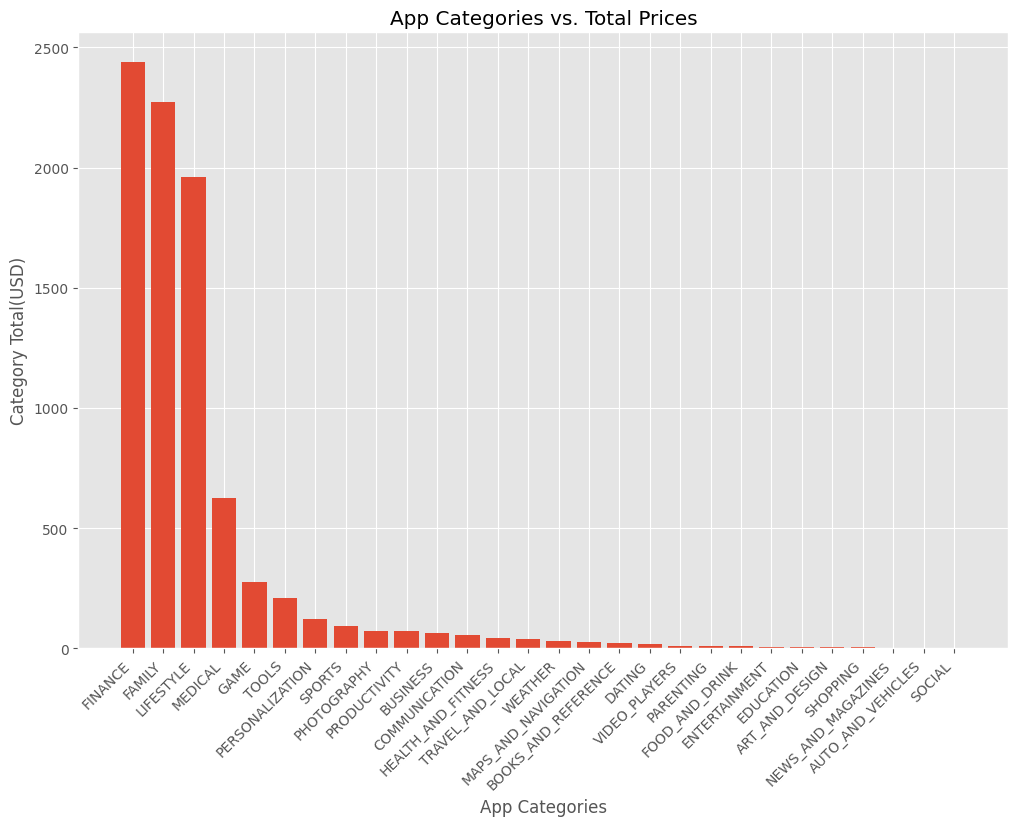

In [8]:
fig, ax_2 = plt.subplots(figsize=(12, 8))
ax_2.bar(df_catergory_prices.index, df_catergory_prices.values)
# to make the chart horizontal, use ax.barh instead of ax.bar above
ax_2.set_xlabel('App Categories')
ax_2.set_title('App Categories vs. Total Prices')
ax_2.set_ylabel('Category Total(USD)')
plt.xticks(rotation=45, ha='right')
plt.show()

## Task_4 - plot a bar chart of the total profit of each category by multiplying the price by the number of installs

In [47]:
df = df.assign(Total_Profit = df.Installs * df.Price)
df.tail(10)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Total_Profit
8187,8187,Manga-FR - Anime Vostfr,COMICS,3.4,291,13.000000,10000,Free,0.0,Everyone,Comics,0.0
8188,8188,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.400000,10000,Free,0.0,Everyone,Books & Reference,0.0
8189,8189,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.300000,100000,Free,0.0,Everyone,News & Magazines,0.0
8190,8190,FR Tides,WEATHER,3.8,1195,0.568359,100000,Free,0.0,Everyone,Weather,0.0
8191,8191,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.604492,1000,Free,0.0,Everyone,Books & Reference,0.0
8192,8192,FR Calculator,FAMILY,4.0,7,2.600000,500,Free,0.0,Everyone,Education,0.0
8193,8193,Sya9a Maroc - FR,FAMILY,4.5,38,53.000000,5000,Free,0.0,Everyone,Education,0.0
8194,8194,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000,100,Free,0.0,Everyone,Education,0.0
8195,8195,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,-99.990000,1000,Free,0.0,Mature 17+,Books & Reference,0.0
8196,8196,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.000000,10000000,Free,0.0,Everyone,Lifestyle,0.0


In [58]:
df_profit=df[['Category','Total_Profit']].groupby('Category')['Total_Profit'].agg('sum').sort_values(ascending=False)
df_profit.head(50)

Category
FAMILY                 1.156748e+08
LIFESTYLE              5.758394e+07
GAME                   4.068784e+07
FINANCE                2.572664e+07
PHOTOGRAPHY            8.546050e+06
PERSONALIZATION        6.796310e+06
MEDICAL                5.872355e+06
TOOLS                  5.462910e+06
SPORTS                 4.706154e+06
PRODUCTIVITY           4.304452e+06
COMMUNICATION          4.247100e+06
WEATHER                4.179885e+06
HEALTH_AND_FITNESS     1.420270e+06
MAPS_AND_NAVIGATION    1.240789e+06
TRAVEL_AND_LOCAL       1.149250e+06
BUSINESS               1.047648e+06
ENTERTAINMENT          7.980000e+05
EDUCATION              4.029900e+05
VIDEO_PLAYERS          3.352900e+05
FOOD_AND_DRINK         2.844000e+05
PARENTING              2.499590e+05
AUTO_AND_VEHICLES      9.950000e+04
BOOKS_AND_REFERENCE    8.890150e+04
DATING                 4.768900e+04
ART_AND_DESIGN         3.184000e+04
SHOPPING               3.014900e+04
NEWS_AND_MAGAZINES     6.445000e+03
SOCIAL             

In [53]:
df_profit.info()

<class 'pandas.core.series.Series'>
Index: 33 entries, FAMILY to HOUSE_AND_HOME
Series name: Total_Profit
Non-Null Count  Dtype  
--------------  -----  
33 non-null     float64
dtypes: float64(1)
memory usage: 528.0+ bytes


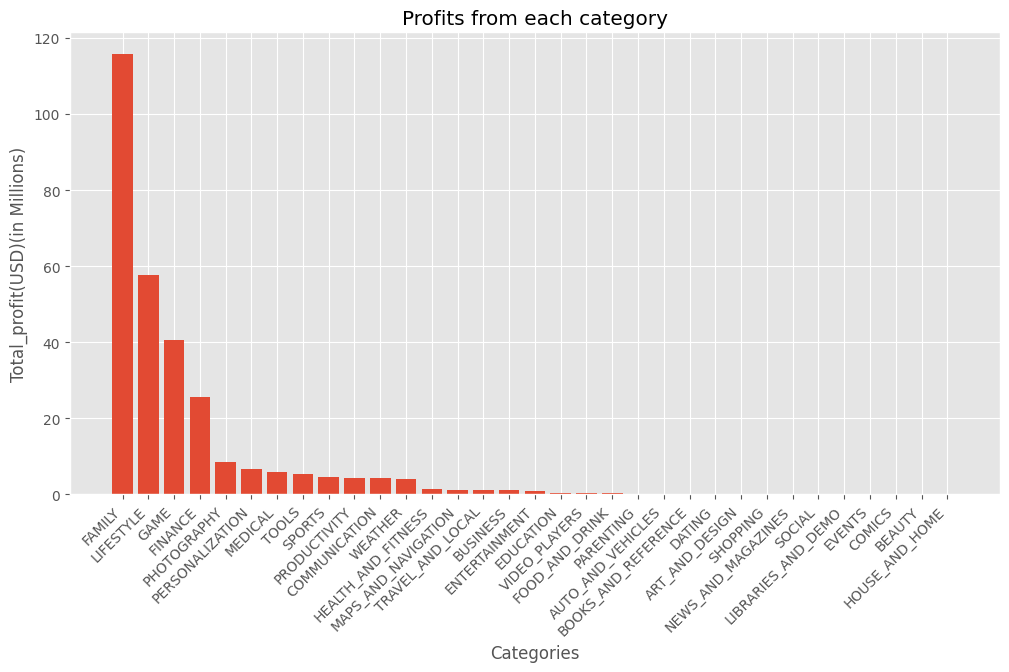

In [57]:
plt.figure(figsize=(12, 6))

# Create a bar chart
plt.bar(df_profit.index, df_profit.values/1_000_000)

# Add a title and axis labels
plt.title('Profits from each category')
plt.xlabel('Categories')
plt.ylabel('Total_profit(USD)(in Millions)')
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()